## THE PROBLEM STATEMENT AND BUSINESS CASE

* In this project , i have search data from kaggle which contains extensive data on the bank customers for the past 6 months.

* Data includes transactions frequency, amount, tenure..etc.

* I like to leverage AI/ML to launch a targeted marketing ad campaign that is tailored to specific group of customers.

* In order for this campaign to be successful, the bank has to divide its customers into at least 3 distinctive groups

* This process is known as "marketing segmentation" and it crucial for maximizing marketing campaign conversion rate.

###  IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



from sklearn.metrics import silhouette_samples, silhouette_score

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("marketing_data.csv")

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## 1. Performing Data Analysis

### 1.1 Minimum and Maximum amount in `Balance` Attribute

In [4]:
max = df['BALANCE'].max()
min = df['BALANCE'].min()
mean = df['BALANCE'].mean()
print("Max = ",max)
print("Min = ",min)
print("Mean = ",mean)

Max =  19043.13856
Min =  0.0
Mean =  1564.4748276781038


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


### 1.2 Data Visualization


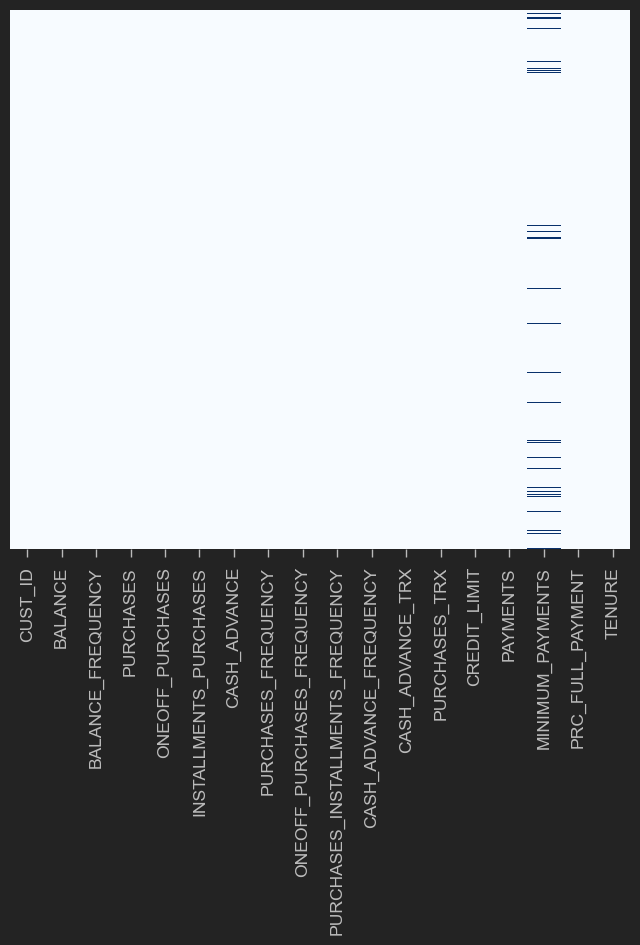

In [6]:
# Let's see if we have any missing data
missing_values_plot = sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# Rows where "Minimum Payments" is null
df[df['MINIMUM_PAYMENTS'].isnull() == True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [9]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [10]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
# Let's see if we have duplicated entries in the data
df.duplicated().sum()

0

In [12]:
df.drop('CUST_ID', axis = 1, inplace= True)
# df.drop('MINIMUM_PAYMENTS', axis = 1, inplace = True)

In [13]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [14]:
n = len(df.columns)
print("length = ",n)

length =  17


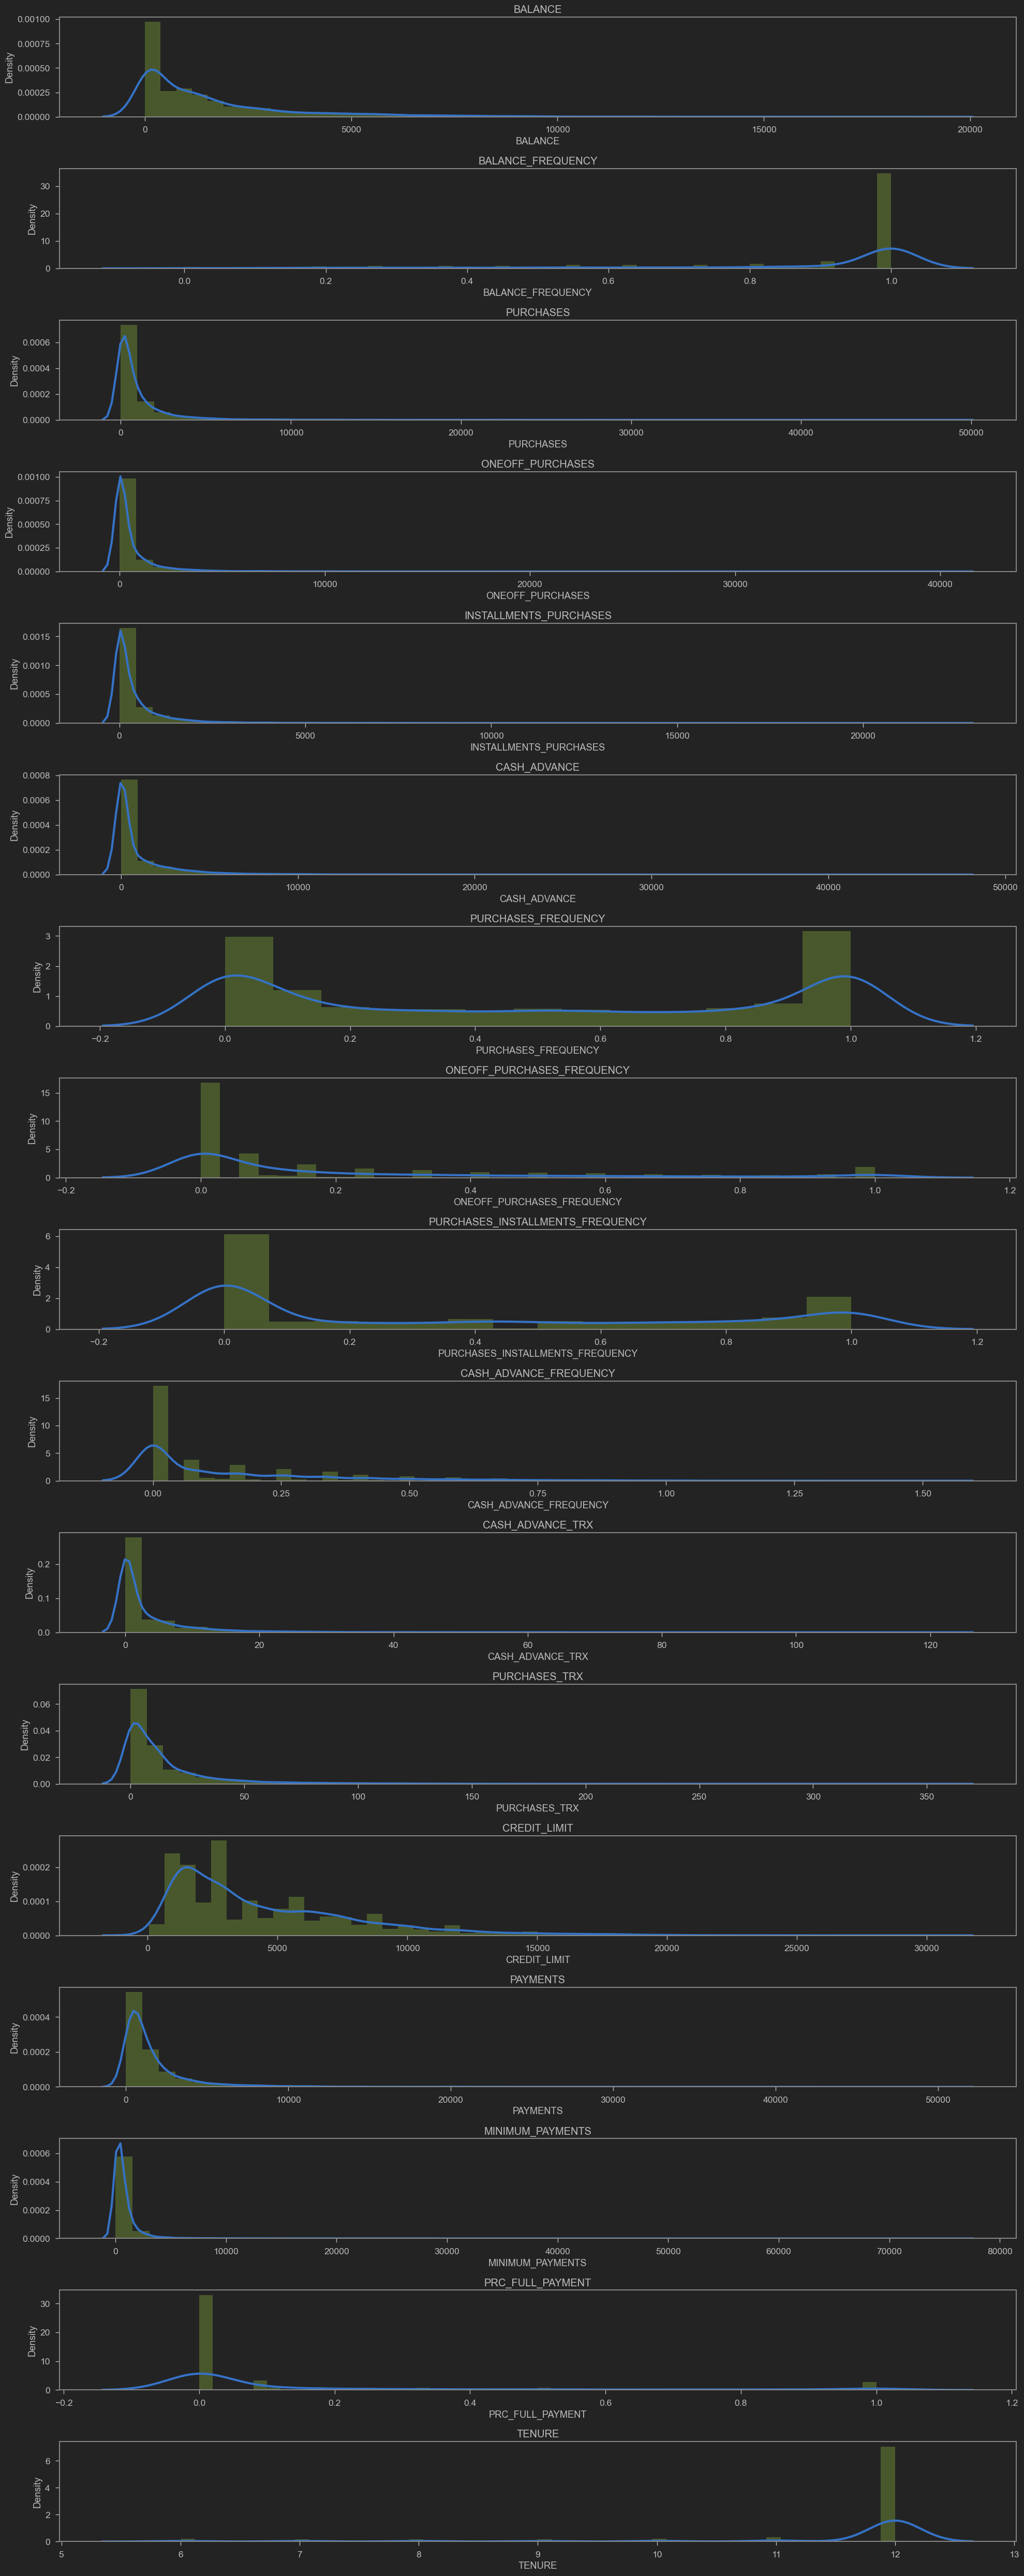

In [15]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

plt.figure(figsize=(20,50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(df.columns[i])
    
plt.tight_layout()

#### Insights

1. Mean of balance is 1500 dollors
2. 'Balance_Frequency' for most customers is updated frequently ~1
3. For 'PURCHASES_FREQUENCY', there are two distinct group of customers
4. For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
5. Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
6. Credit limit average is around $4500
7. Most customers are ~11 or ~12 years tenure


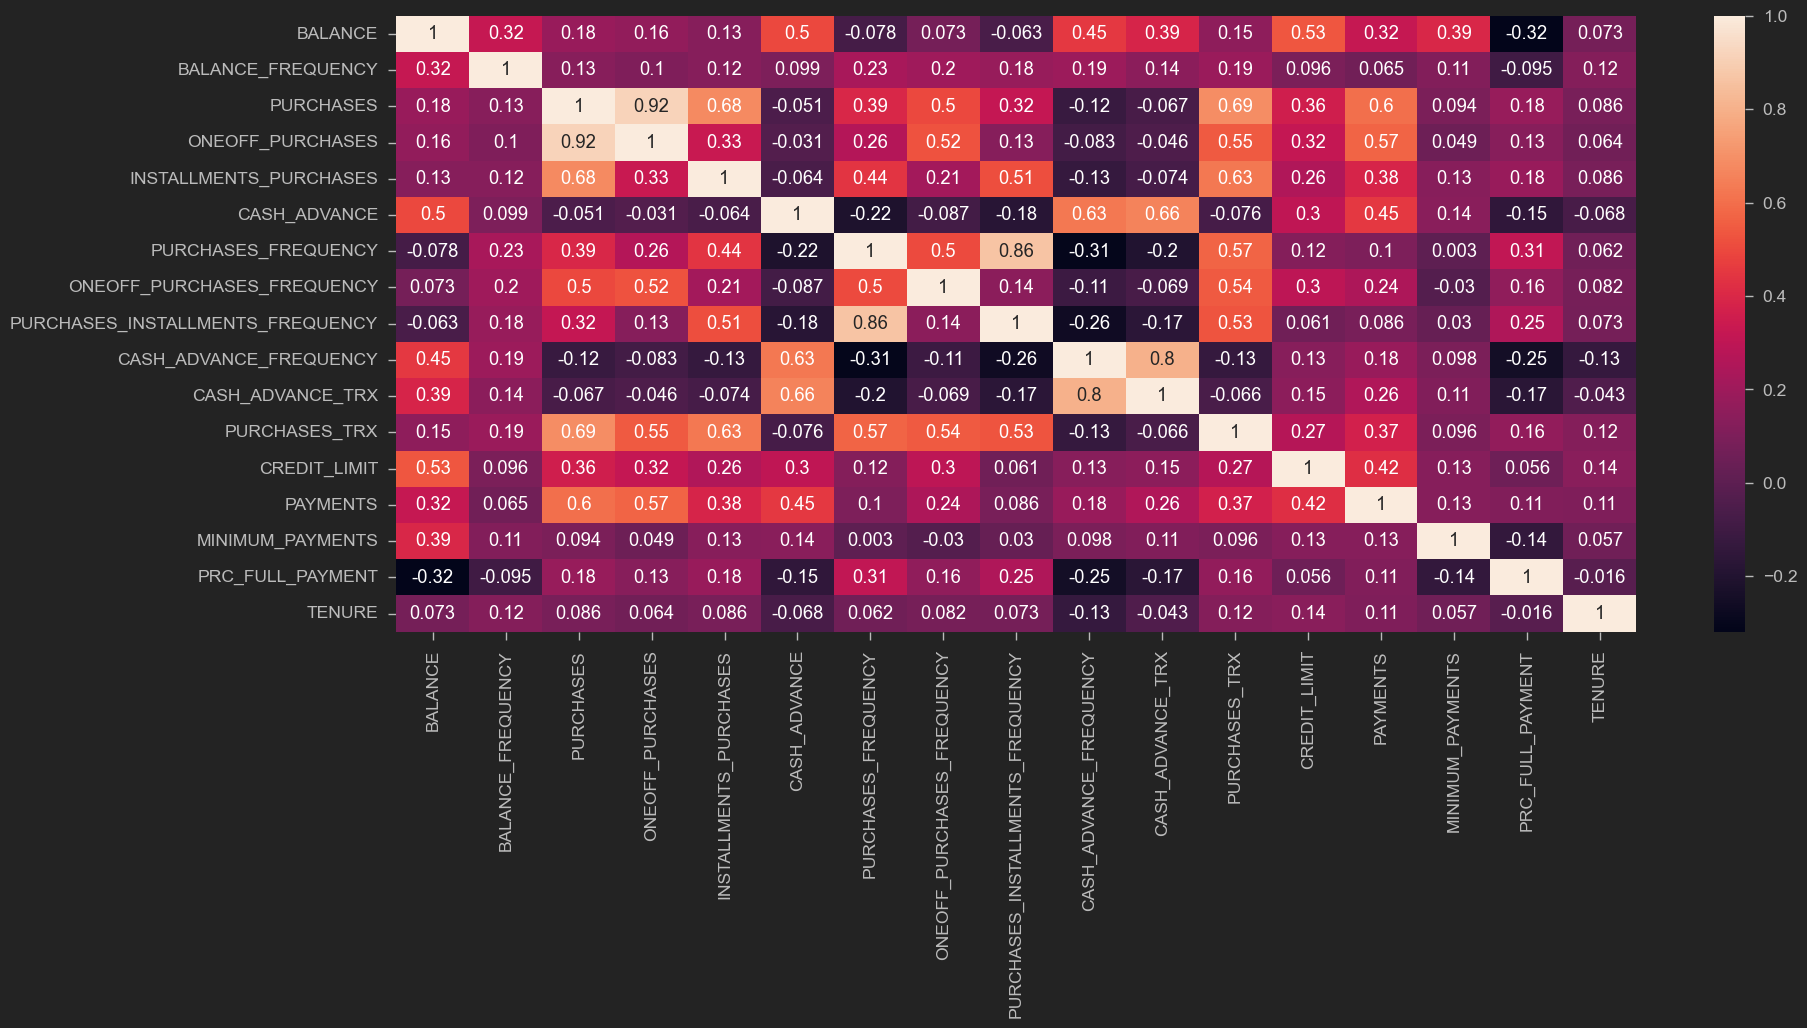

In [16]:
correlations = df.corr()
plt.subplots(figsize = (20, 8))
sns.heatmap(correlations, annot = True)
plt.show()

#### Insights

1. 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions 
and payments. 
2. Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

## Scaling the DataFrame

In [17]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [18]:
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
scaled_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.195651e-16,1.209548e-14,-9.278518e-16,3.916048e-15,2.275424e-15,5.697020e-15,-3.716084e-16,2.021052e-15,2.353921e-16,5.856519e-16,-7.151821e-16,-3.570713e-15,-5.142466e-15,-3.264056e-16,1.873114e-17,-2.199184e-15,1.556446e-14
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-1.221536e+00,-5.986883e-01,-3.708230e-01,-5.255510e-01,-4.122768e+00
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-7.955261e-01,-4.662913e-01,-2.975162e-01,-5.255510e-01,3.606795e-01
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-4.107426e-01,-3.026846e-01,-2.268130e-01,-5.255510e-01,3.606795e-01
75%,2.352559e-01,5.180838e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,5.512163e-01,5.802976e-02,-4.390474e-16,-3.712234e-02,3.606795e-01
max,8.397489e+00,5.180838e-01,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,7.010083e+00,1.692228e+01,3.241509e+01,2.893453e+00,3.606795e-01


## Dimensionality reduction

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2,random_state=42)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682221,-1.076453
1,-1.138292,2.506465
2,0.969685,-0.383512
3,-0.873628,0.043159
4,-1.599435,-0.688581
...,...,...
8945,-0.359631,-2.016143
8946,-0.564374,-1.639120
8947,-0.926206,-1.810784
8948,-2.336555,-0.657964


# Model Building using KMeans

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

-Before applying k means lets find the k value

-Finding `k` value by Elbow Method

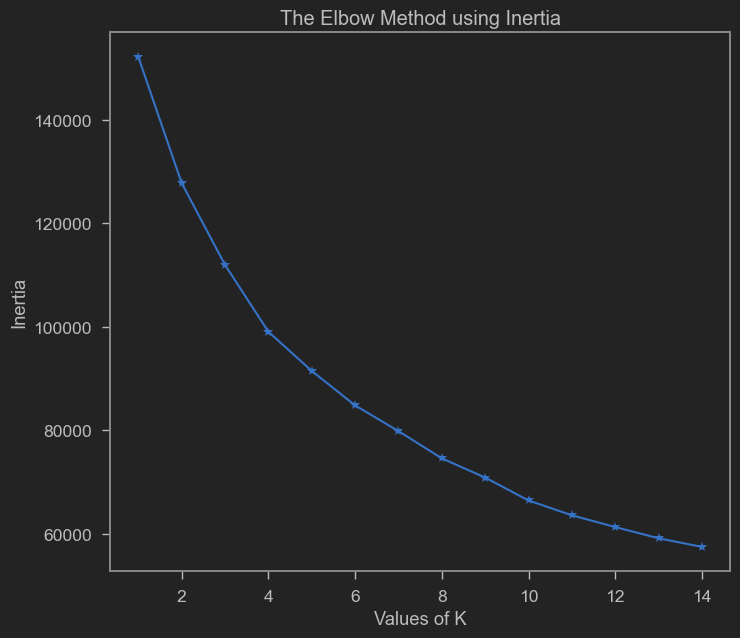

In [22]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'b*-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [48]:
kmeans_model=KMeans(n_clusters=4,random_state= 42)
#kmeans_model.fit_predict(scaled_df)
#pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'Group':kmeans_model.labels_})],axis=1)
pca_kmeans=kmeans_model.fit_predict(scaled_df)


In [49]:
df['Group']=pca_kmeans
scaled_df['Group'] = pca_kmeans
pca_df['Group'] = pca_kmeans

In [50]:
pca_kmeans

array([3, 2, 1, ..., 1, 3, 3])

In [51]:
def spider_plot(data, title):
    means = data.groupby("Group").mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(means)):
        plt.plot(label_loc, means[i], label=f'Group {categories[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend()
    plt.show()


## Standard, Imputed Data vs Labels!
the following plot should give us a better understanding on our clusters:

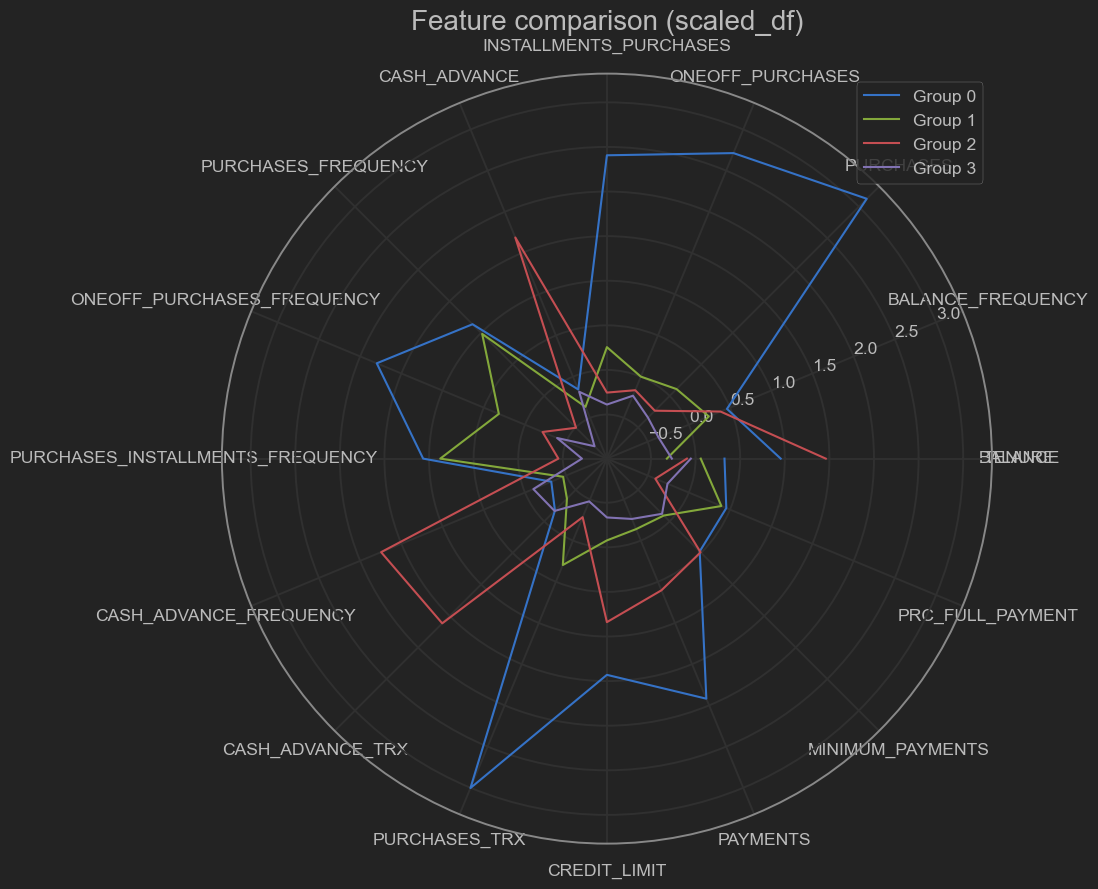

In [52]:
spider_plot(scaled_df,'scaled_df' )

Wow! now we are talking. I know it's hard to read, but I just want you to notice these points:

- Group 0 contains customers who have a good income (second highest `BALANCE`) and are enjoying it! they purchase a lot (highest `PURCHASESFREQUENCY`), both in installments and in one-go. let's call them **Bourgeoisie**!

- Group 1 contains customers who don't make a lot of money (look at their `BALANCE`, it is the lowest of all) but this doen't keep them away from purchasing stuff! in terms of `PURCHASES`, they are the second class. how do they do this? take a closer look: they don't buy stuff in one go (they have lowest ammount of `ONEOFF_PURCHASES` and `ONEOFF PURCHASES FREQUENCY`) their key to success is _instalments!_ It's easy: if you don't make enough money to buy stuff in one go, just pay over a period of time. (They have highest values of `INSTALLMENTSPURCHASES` and `PURCHASESINSTALLMENTSFREQUENCY`  I refer to these people as **Dreamers** because although they don't make much money, lack of money doesn't prevent them from reaching for their dreams!

- Group 2 is mysterious. look at them! they have highest `BALANCE`, but lowest `PURCHASE` of all! it seems they only use their fortunes when they want pay in advance (highest `CASHADVANCE`, `CASHADVANCEFREQUENCY` and `CASHADVANCETRX`). A cash advance is a service provided by most credit card and charge card issuers. The service allows cardholders to withdraw cash, either through an ATM or over the counter at a bank or other financial agency, up to a certain limit. For a credit card, this will be the credit limit (or some percentage of it). so, these guys don't use their credit cards to buy stuff, instead, they get chash from ATMs to do so. why? it is beause they want to buy something illegal? Let's just call them **The Mafia** for now.

- Group 3 shows customers who are not very rich, and don't take risks. their `BALANCE` (amount left in their account to make purchases) is below average, and they don't purchase much. (their `PURCHASES` is below average as well, and their `PURCHASE FREQUENCY` is very low.) I call these people **Economicals**. to them, every penny is important.


In [53]:
print(f'Silhouette Score = {silhouette_score(pca_df, pca_kmeans)}')

print(f'Silhouette Samples = {silhouette_samples(pca_df, pca_kmeans)}')

#the score is impressive which means our cluster are neither overlaping nor tight clusters

Silhouette Score = 0.4992866715615686
Silhouette Samples = [0.63300434 0.35823128 0.55249751 ... 0.22360298 0.64401382 0.55818347]


## Let do some more EDA

Evaluating our hypothesis

now, I want to plot our data using only BALANCE and PURCHASES. this is my hypothesis:

If BALANCE is high and PURCHASES is high ➡ Class 0 (Bourgeoisie 🛍️)

If BALANCE is low and PURCHASES is high ➡ Class 1 (Dreamers ✨)

If BALANCE is high and PURCHASES is low ➡ Class 2 (The Mafia 🕶️)

If BALANCE is low and PURCHASES is low ➡ Class 3 (Economicals 💲)


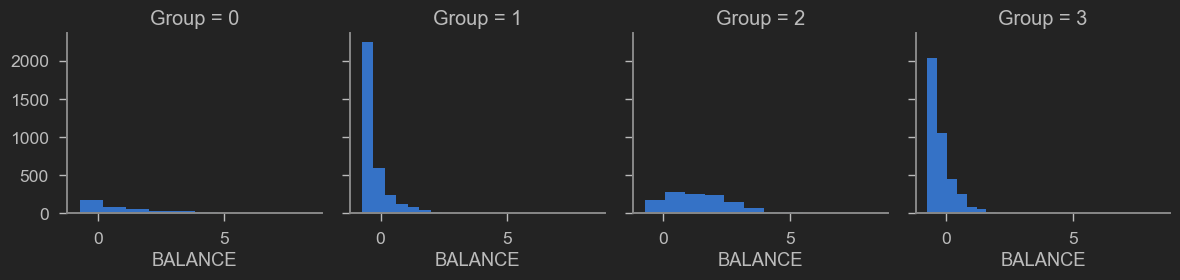

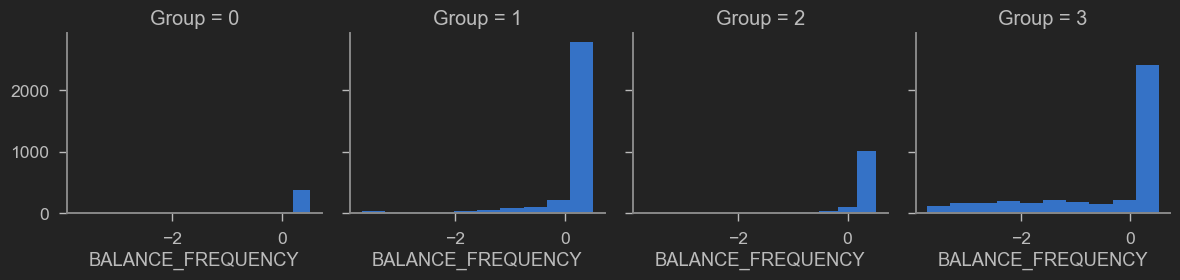

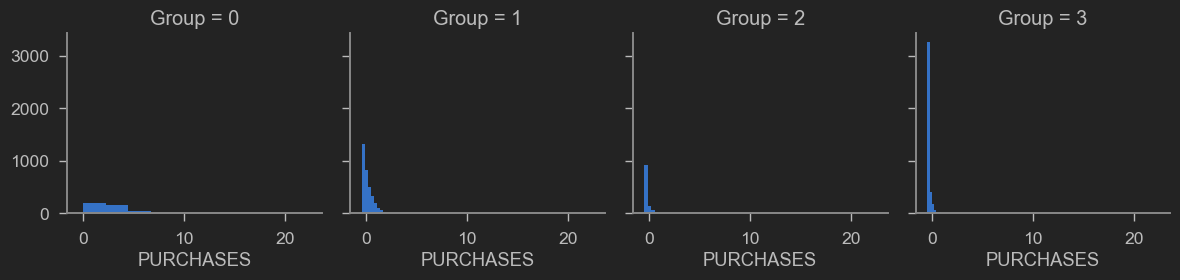

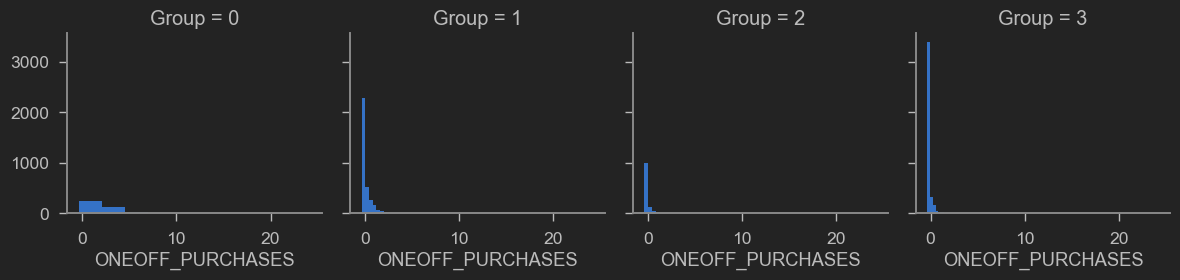

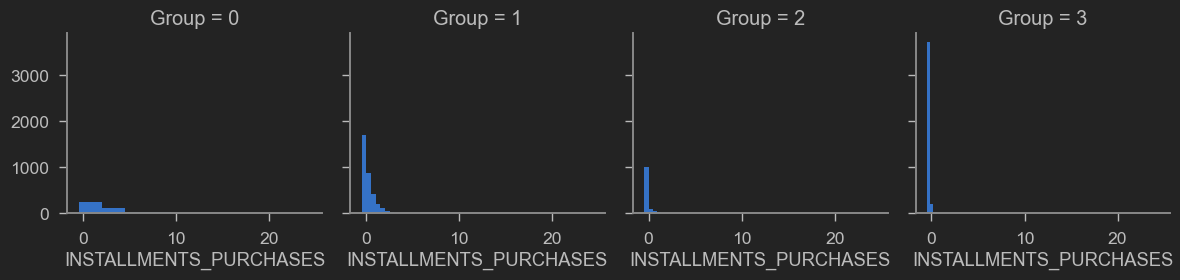

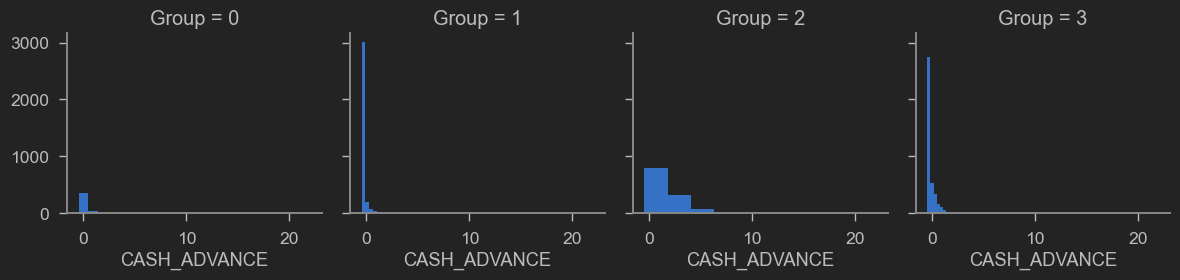

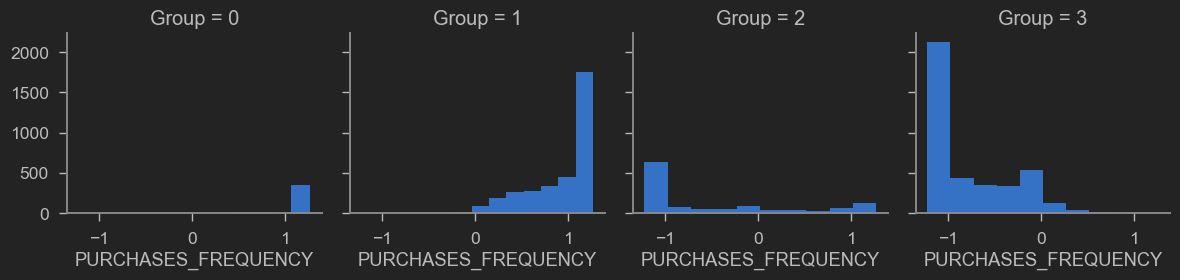

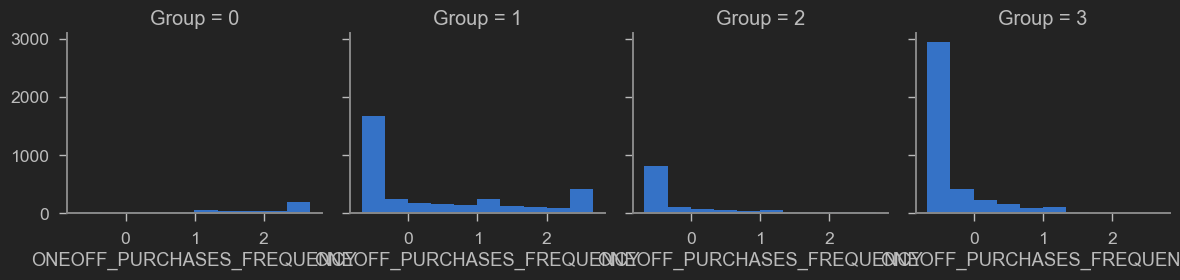

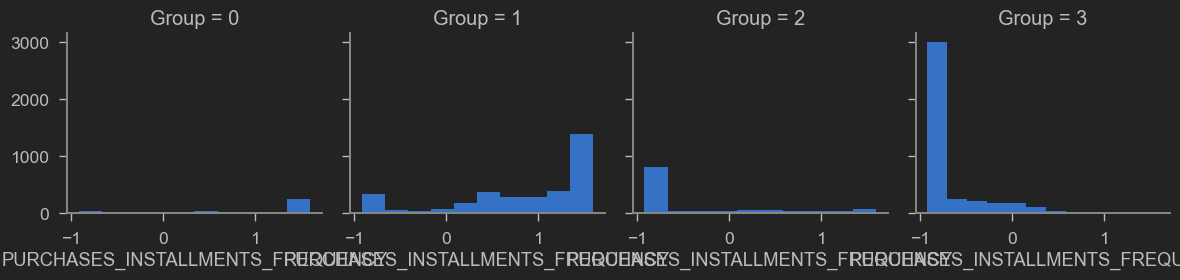

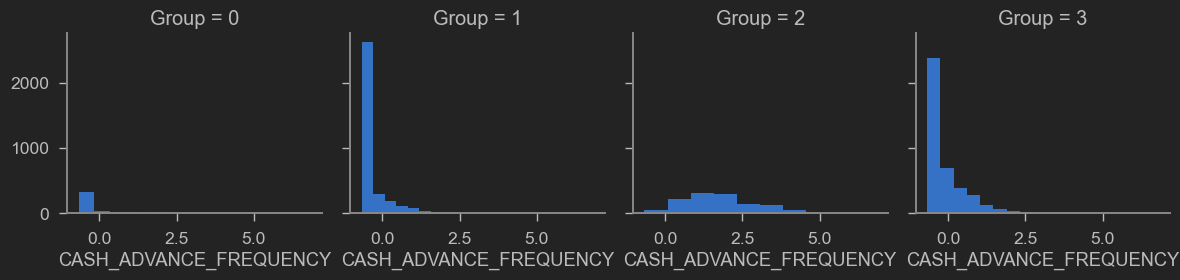

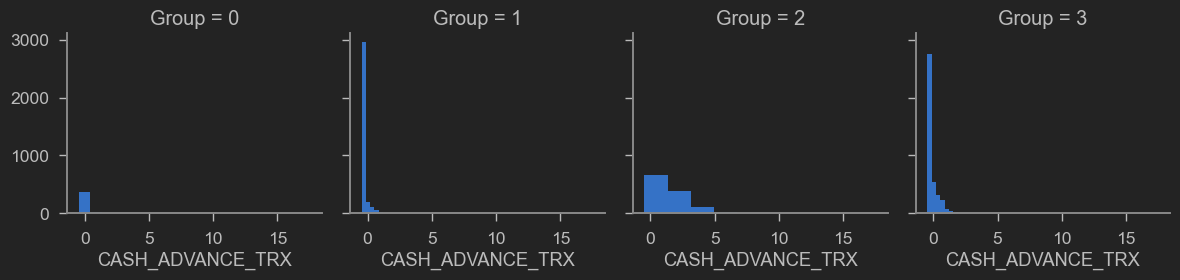

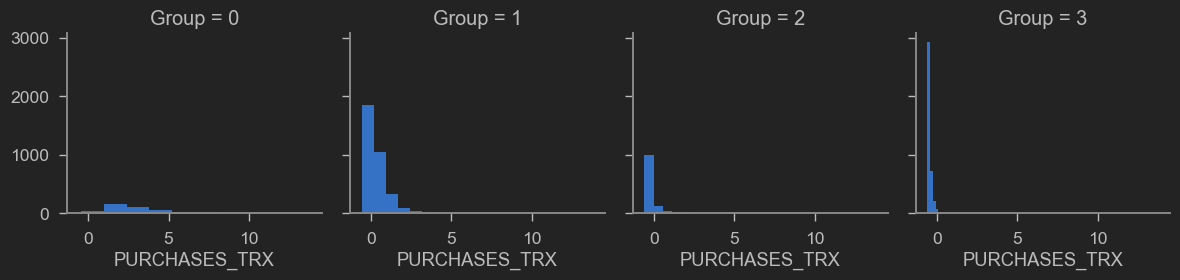

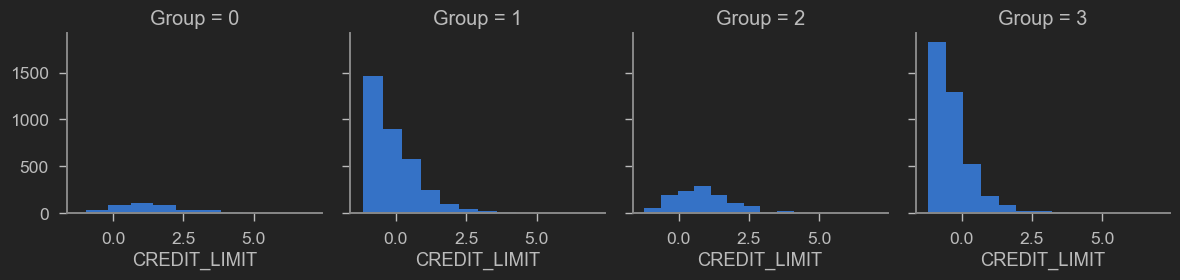

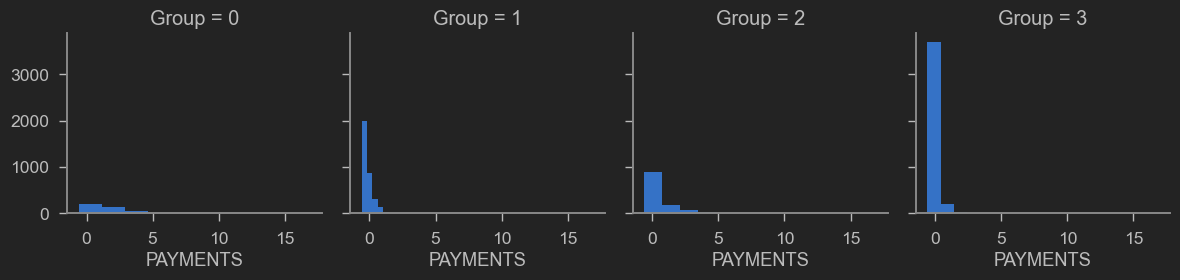

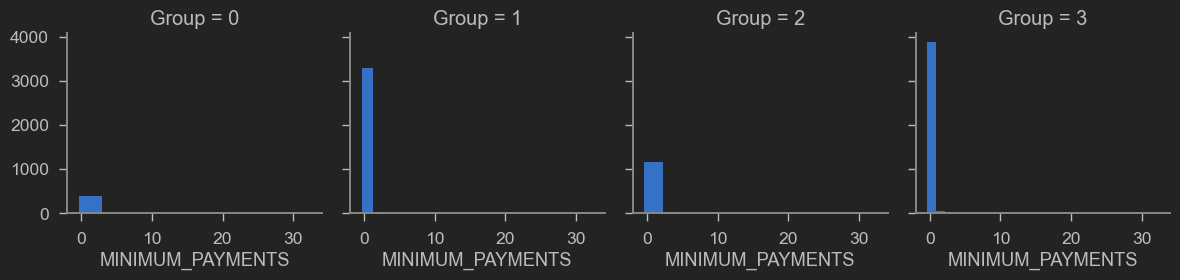

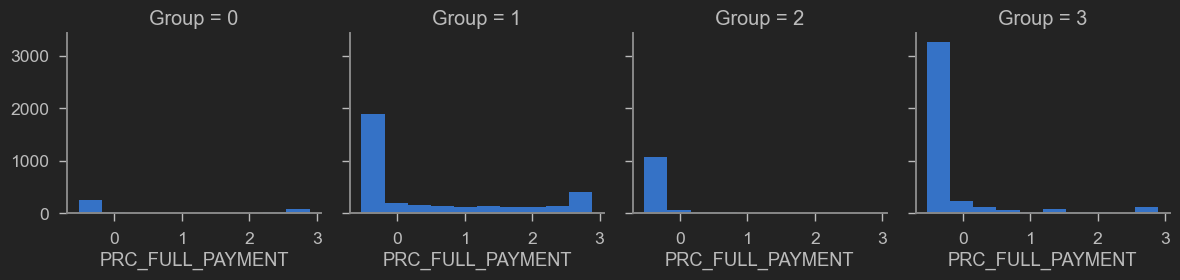

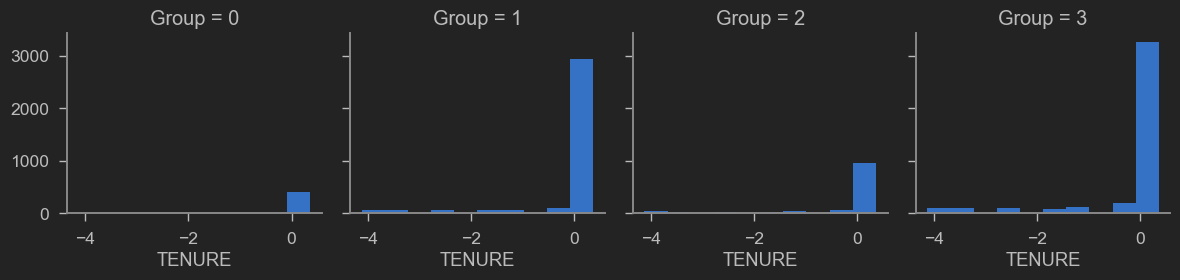

In [54]:
for c in scaled_df.drop(['Group'],axis=1):
    grid= sns.FacetGrid(scaled_df, col='Group')
    grid= grid.map(plt.hist, c)
plt.show()

In [55]:
def kde_plot(data,x):
    LABEL_COLOR_MAP = {0 : 'b',1 : 'g',2 : 'r',3 : 'm'}
    sns.kdeplot(data=data, x=x, hue="Group", palette=LABEL_COLOR_MAP)

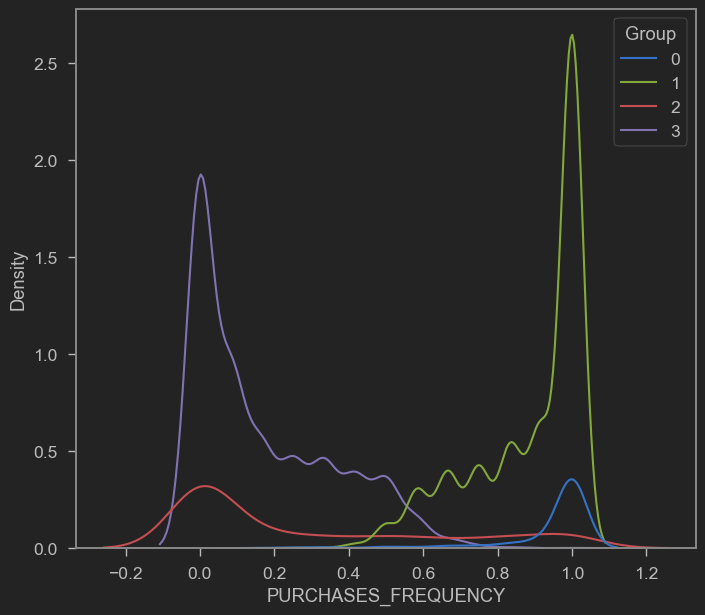

In [56]:
kde_plot(df, 'PURCHASES_FREQUENCY')

looking at this plot, it is obvious that ***the mafia*** and ***economicals*** are purchasing less often than ***dreamers*** and ***Bourgeoisie***

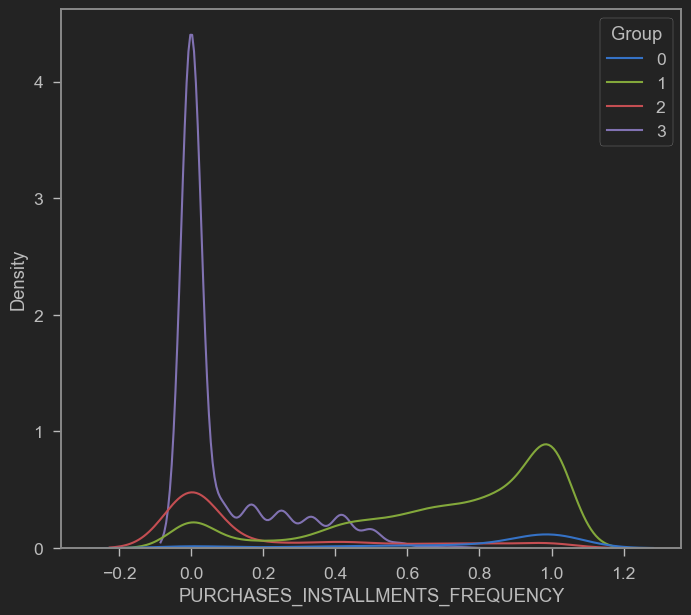

In [57]:
kde_plot(df, 'PURCHASES_INSTALLMENTS_FREQUENCY')

This plot shows how ***the dreamers*** are trying to buy whatever they persue, by buying first and paying later.

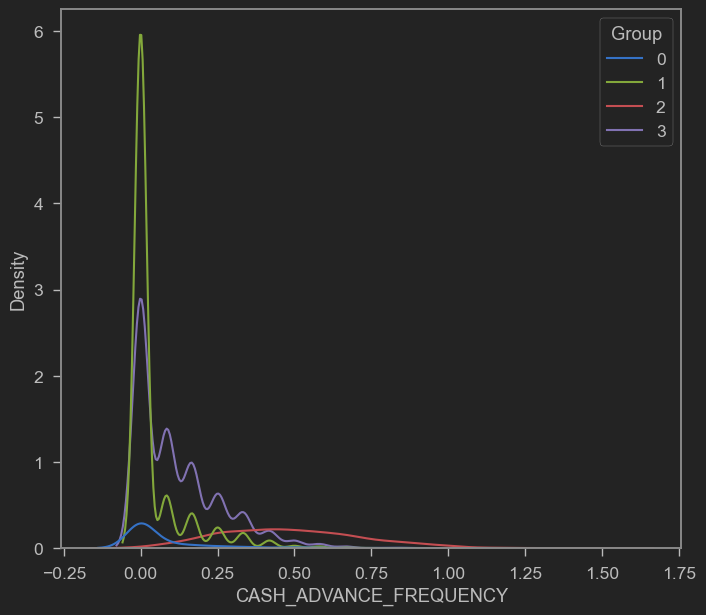

In [58]:
kde_plot(df, 'CASH_ADVANCE_FREQUENCY')

and this plot shows that the infamous ***mafia*** are getting cash from ATMs more often than other groups.

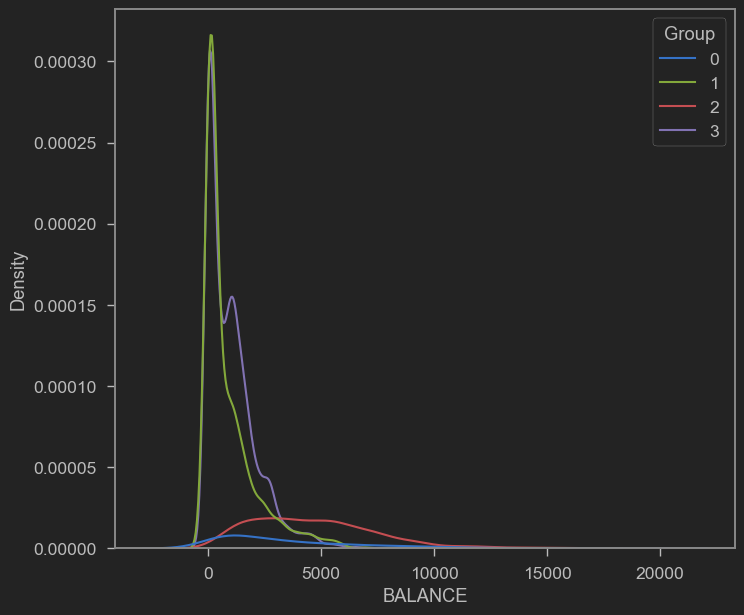

In [59]:
kde_plot(df, 'BALANCE')

The ***mafia*** and the ***Bourgeoisie*** has highest balance then others

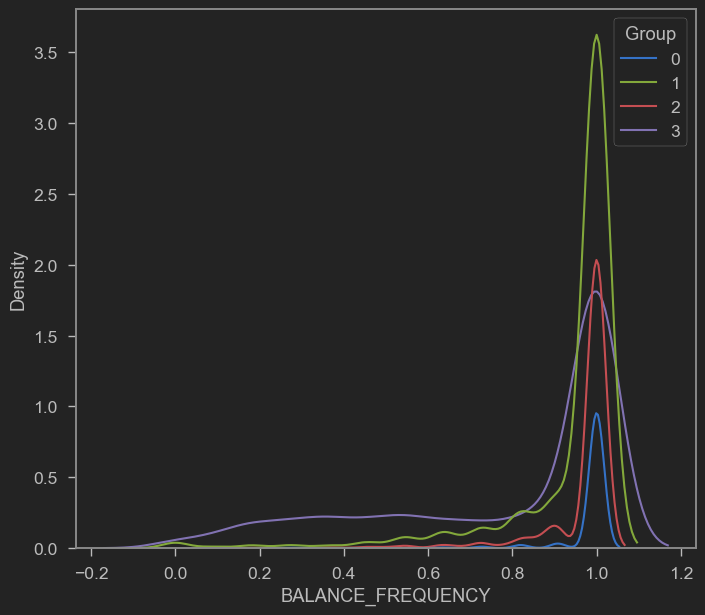

In [60]:
kde_plot(df, 'BALANCE_FREQUENCY')

Here we can see that the ***dreamers*** balance is getting updated more then the other which might means they are buys things on installement 

It looks like my hypothesis was quite right.

in this plot, it is clear that:

- people of Class 0 have high balance and purchase a lot
- people of Class 1 spend a lot while they have low balance.
- people of Class 2 have a low balance and spend less than others
- people of Class 3 don't purchase much, although they have lots of money
we can further investigate this hypothesis using some plots:

<Axes: xlabel='Group', ylabel='count'>

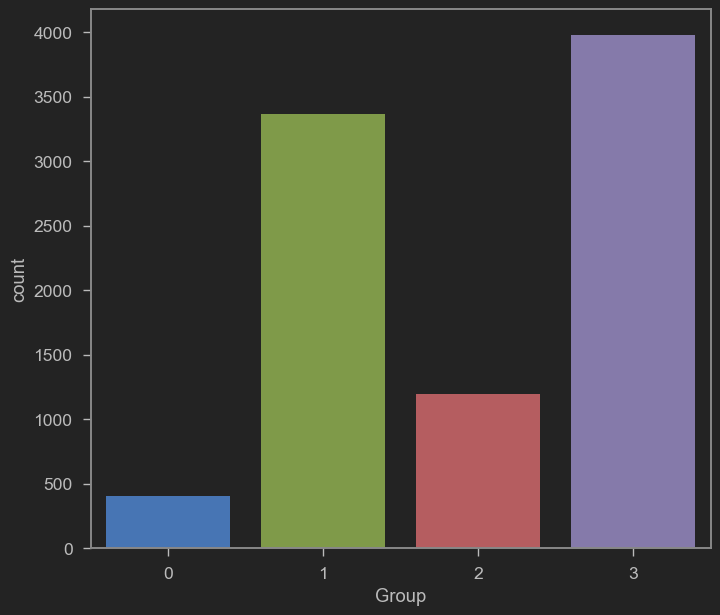

In [61]:
sns.countplot(x='Group', data=df)

# Saving the kmeans clustering model and the data with cluster label

In [62]:
df['Group'] =df['Group'].replace(to_replace=0, value='Group_A')


In [63]:
df['Group'] = df['Group'].replace(to_replace=1, value='Group_B')

In [64]:
df['Group'] = df['Group'].replace(to_replace=2, value='Group_C')

In [65]:
df['Group'] = df['Group'].replace(to_replace=3, value='Group_D')

In [66]:
df['Group']

0       Group_D
1       Group_C
2       Group_B
3       Group_D
4       Group_D
         ...   
8945    Group_B
8946    Group_B
8947    Group_B
8948    Group_D
8949    Group_D
Name: Group, Length: 8950, dtype: object

In [67]:
df.sample(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Group
8892,2.303628,0.285714,0.00,0.00,0.00,157.253266,0.000000,0.000000,0.000000,0.142857,1,0,500.0,571.965219,1.519351,0.000000,7,Group_D
7794,223.281483,1.000000,4151.48,3113.59,1037.89,0.000000,1.000000,0.916667,1.000000,0.000000,0,92,3000.0,3450.614791,171.300306,0.900000,12,Group_A
6169,56.798467,1.000000,93.10,0.00,93.10,0.000000,0.583333,0.000000,0.583333,0.000000,0,7,2500.0,83.556361,172.482173,0.000000,12,Group_B
4753,10929.059580,1.000000,675.89,500.39,175.50,1521.869211,0.916667,0.250000,0.666667,0.333333,12,12,12000.0,2639.956641,3049.937917,0.000000,12,Group_C
6314,448.539091,1.000000,300.00,300.00,0.00,1105.396152,0.083333,0.083333,0.000000,0.250000,3,1,5400.0,3860.659948,1681.982864,0.636364,12,Group_D
6933,379.740550,1.000000,1348.41,546.21,802.20,0.000000,0.666667,0.416667,0.500000,0.000000,0,25,1300.0,430.736402,163.305423,0.000000,12,Group_B
898,6366.085376,0.818182,407.86,307.80,100.06,14827.307160,0.083333,0.083333,0.083333,0.166667,2,5,12500.0,5722.548016,1746.966239,0.000000,12,Group_C
3128,99.527723,0.818182,1059.59,1059.59,0.00,0.000000,0.666667,0.666667,0.000000,0.000000,0,14,2500.0,1438.379172,162.415247,0.833333,12,Group_B
222,41.642389,0.857143,75.99,75.99,0.00,0.000000,0.142857,0.142857,0.000000,0.000000,0,1,2700.0,69.163384,99.401747,0.000000,7,Group_D
1305,3892.352781,1.000000,6068.82,5368.71,700.11,1806.056940,0.750000,0.583333,0.333333,0.333333,12,61,7500.0,4417.825690,1764.680048,0.000000,12,Group_A


In [68]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [69]:
df.to_csv("Clustered_Customers_Data.csv")

# Training and Testing the model accuracy using decision tree

In [132]:
cluster_df=pd.read_csv("Clustered_Customers_Data.csv")

In [133]:
from sklearn.model_selection import train_test_split

In [172]:
#Split Dataset
X = cluster_df.drop(columns=['Unnamed: 0	','Group'],axis=1)
y= cluster_df[['Group']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)


In [173]:
print("train data",X_train.shape)
print("test_data",X_test.shape)

train data (6265, 17)
test_data (2685, 17)


In [174]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8107,40.977812,0.454545,502.92,0.00,502.92,0.000000,0.416667,0.000000,0.416667,0.000000,0,6,4000.0,748.302786,177.375481,0.750000,12
6115,58.239998,1.000000,556.93,556.93,0.00,453.660855,0.166667,0.166667,0.000000,0.166667,7,5,4700.0,0.000000,864.206542,0.000000,12
797,197.555397,1.000000,1876.80,0.00,1876.80,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,5000.0,1715.207478,163.663033,1.000000,12
8103,32.369733,1.000000,326.45,76.00,250.45,0.000000,0.916667,0.083333,0.750000,0.000000,0,12,1000.0,243.721693,180.646996,0.400000,12
1156,76.059828,1.000000,927.10,927.10,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,1500.0,906.712652,163.265372,1.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7418,21.881528,1.000000,89.04,89.04,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,2500.0,193.985335,96.885791,0.000000,12
6872,676.588508,0.909091,0.00,0.00,0.00,1830.796140,0.000000,0.000000,0.000000,0.636364,14,0,2000.0,1858.706202,383.983971,0.125000,11
6173,932.153207,1.000000,572.64,0.00,572.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,24,1000.0,1794.686669,3605.683246,0.083333,12
4665,2719.639153,1.000000,715.81,715.81,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,7,10000.0,694.102974,724.758705,0.000000,12


In [175]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logr_liblinear = LogisticRegression(verbose=1,solver='liblinear')

logr_liblinear.fit(X_train,y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [176]:
logr_liblinear.score(X_train,y_train)

0.9481245011971269

In [138]:
Y_pred_log=logr_liblinear.predict(X_test)
Y_pred_log1=logr_liblinear.predict(X_train)

In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(y_test,Y_pred_log)


array([[ 101,   23,    1,    0],
       [   2,  979,    0,   29],
       [   1,   12,  364,   29],
       [   1,   42,   21, 1080]], dtype=int64)

In [140]:
print ("Accuracy : ", accuracy_score(y_test, Y_pred_log))

Accuracy :  0.9400372439478585


In [141]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,Y_pred_log))

              precision    recall  f1-score   support

     Group_A       0.96      0.81      0.88       125
     Group_B       0.93      0.97      0.95      1010
     Group_C       0.94      0.90      0.92       406
     Group_D       0.95      0.94      0.95      1144

    accuracy                           0.94      2685
   macro avg       0.95      0.90      0.92      2685
weighted avg       0.94      0.94      0.94      2685



In [142]:
#random_forest_classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [143]:
clf.score(X_train,y_train)

1.0

In [144]:
y_pred_rf = clf.predict(X_test)
print ("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.958659217877095


In [145]:
y_pred_rf1 = clf.predict(X_train)

In [146]:
print(clf)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_pred_rf1))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred_rf))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred_rf))

RandomForestClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       1.00      1.00      1.00       284
     Group_B       1.00      1.00      1.00      2357
     Group_C       1.00      1.00      1.00       792
     Group_D       1.00      1.00      1.00      2832

    accuracy                           1.00      6265
   macro avg       1.00      1.00      1.00      6265
weighted avg       1.00      1.00      1.00      6265

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.95      0.84      0.89       125
     Group_B       0.95      0.97      0.96      1010
     Group_C       0.97      0.91      0.94       406
     Group_D       0.96      0.98      0.97      1144

    accuracy                           0.96      2685
   macro avg       0.96      0.93      0.94      2685
weighted avg 

In [147]:
#Hyperparameter Tuning on RandomForest
from sklearn.model_selection import RandomizedSearchCV

In [148]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [149]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [150]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [151]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  14.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  14.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  22.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  23.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [152]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10}

In [153]:
rf_new = RandomForestClassifier(n_estimators=900,min_samples_split=5,min_samples_leaf=5,max_features='sqrt',max_depth=10)

In [154]:
rf_new.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=900)

In [155]:
y_pred_rg = rf_new.predict(X_test)

In [156]:
y_pred_rg_train = rf_new.predict(X_train)

In [157]:
confusion_matrix(y_test, y_pred_rg)


array([[ 104,   17,    1,    3],
       [   5,  974,    3,   28],
       [   1,   15,  370,   20],
       [   0,   28,    6, 1110]], dtype=int64)

In [158]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_rg))

Accuracy :  0.9527001862197393


In [159]:
print(rf_new)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_pred_rg_train))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred_rg))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred_rg))

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=900)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       1.00      0.93      0.96       284
     Group_B       0.97      0.99      0.98      2357
     Group_C       0.99      0.97      0.98       792
     Group_D       0.98      0.98      0.98      2832

    accuracy                           0.98      6265
   macro avg       0.99      0.97      0.98      6265
weighted avg       0.98      0.98      0.98      6265

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.95      0.83      0.89       125
     Group_B       0.94      0.96      0.95      1010
     Group_C       0.97      0.91      0.94       406
     Group_D       0.96      0.97      0.96      1144

    accuracy               

In [177]:
import lightgbm as lgb
light = lgb.LGBMClassifier()
light.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2336
[LightGBM] [Info] Number of data points in the train set: 6265, number of used features: 17
[LightGBM] [Info] Start training from score -3.093760
[LightGBM] [Info] Start training from score -0.973778
[LightGBM] [Info] Start training from score -2.004581
[LightGBM] [Info] Start training from score -0.815770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [178]:
lgb_pred=light.predict(X_test)

In [179]:
light.score(X_train,y_train)

1.0

In [180]:
print ("Accuracy : ", accuracy_score(y_test, lgb_pred))

Accuracy :  0.9694599627560522


In [181]:
confusion_matrix(y_test, lgb_pred)

array([[ 111,   11,    3,    0],
       [   3,  981,    9,    8],
       [   3,    4,  338,    9],
       [   0,   18,   14, 1173]], dtype=int64)

In [182]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

     Group_A       0.95      0.89      0.92       125
     Group_B       0.97      0.98      0.97      1001
     Group_C       0.93      0.95      0.94       354
     Group_D       0.99      0.97      0.98      1205

    accuracy                           0.97      2685
   macro avg       0.96      0.95      0.95      2685
weighted avg       0.97      0.97      0.97      2685



In [183]:
from lightgbm import LGBMClassifier

In [184]:
lgb_tuned =LGBMClassifier(random_state=3,n_jobs=-1)

params = {'n_estimators':np.arange(80,120)}

gscv = GridSearchCV(lgb_tuned,param_grid=params,cv=3,scoring='f1',n_jobs=-1,verbose=True)
gscv.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2336
[LightGBM] [Info] Number of data points in the train set: 6265, number of used features: 17
[LightGBM] [Info] Start training from score -3.093760
[LightGBM] [Info] Start training from score -0.973778
[LightGBM] [Info] Start training from score -2.004581
[LightGBM] [Info] Start training from score -0.815770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=3, estimator=LGBMClassifier(n_jobs=-1, random_state=3),
             n_jobs=-1,
             param_grid={'n_estimators': array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119])},
             scoring='f1', verbose=True)

In [185]:
gscv.best_params_

{'n_estimators': 80}

In [186]:
lgb_tuned = LGBMClassifier(random_state=3,n_jobs=-1,n_estimators=80)

In [187]:
lgb_tuned.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2336
[LightGBM] [Info] Number of data points in the train set: 6265, number of used features: 17
[LightGBM] [Info] Start training from score -3.093760
[LightGBM] [Info] Start training from score -0.973778
[LightGBM] [Info] Start training from score -2.004581
[LightGBM] [Info] Start training from score -0.815770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(n_estimators=80, n_jobs=-1, random_state=3)

In [188]:
lgb_tuned.score(X_train,y_train)

1.0

In [189]:
lgb_pred1=lgb_tuned.predict(X_test)

In [190]:
lgb_pred_train=lgb_tuned.predict(X_train)

In [191]:
print ("Accuracy : ", accuracy_score(y_test, lgb_pred1))

Accuracy :  0.9702048417132216


In [192]:
confusion_matrix(y_test, lgb_pred1)

array([[ 113,   10,    2,    0],
       [   3,  982,    8,    8],
       [   3,    4,  339,    8],
       [   0,   19,   15, 1171]], dtype=int64)

In [193]:
from sklearn.metrics import classification_report

In [194]:
print(lgb_tuned)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, lgb_pred_train))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, lgb_pred1))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, lgb_pred1))

LGBMClassifier(n_estimators=80, n_jobs=-1, random_state=3)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       1.00      1.00      1.00       284
     Group_B       1.00      1.00      1.00      2366
     Group_C       1.00      1.00      1.00       844
     Group_D       1.00      1.00      1.00      2771

    accuracy                           1.00      6265
   macro avg       1.00      1.00      1.00      6265
weighted avg       1.00      1.00      1.00      6265

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.95      0.90      0.93       125
     Group_B       0.97      0.98      0.97      1001
     Group_C       0.93      0.96      0.94       354
     Group_D       0.99      0.97      0.98      1205

    accuracy                           0.97      2685
   macro avg       0.96      0.95

In [195]:
#Decision_Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [196]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, KFold

In [197]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9366852886405959


In [198]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 102   22    1    0]
 [   4  961   12   24]
 [   3   12  321   18]
 [   0   42   32 1131]]
              precision    recall  f1-score   support

     Group_A       0.94      0.82      0.87       125
     Group_B       0.93      0.96      0.94      1001
     Group_C       0.88      0.91      0.89       354
     Group_D       0.96      0.94      0.95      1205

    accuracy                           0.94      2685
   macro avg       0.93      0.91      0.91      2685
weighted avg       0.94      0.94      0.94      2685



In [199]:
dc_tuned =DecisionTreeClassifier()

params = {"criterion":['gini','entropy'],
         "max_depth":range(1,10),
         "min_samples_split":range(1,10),
         "min_samples_leaf":range(1,5)}

dscv = GridSearchCV(dc_tuned,param_grid=params,cv=10,n_jobs=-1,verbose=1)
dscv.fit(X_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [200]:
dscv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [201]:
dscv_tuned = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=3,min_samples_split=3)

In [202]:
dscv_tuned.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=3)

In [203]:
dscv_tuned.score(X_train,y_train)

0.9581803671189146

In [204]:
dscv_pred1=dscv_tuned.predict(X_test)

In [205]:
dscv_pred_train=dscv_tuned.predict(X_train)

In [206]:
print ("Accuracy : ", accuracy_score(y_test, dscv_pred1))

Accuracy :  0.9307262569832402


In [207]:
confusion_matrix(y_test, dscv_pred1)

array([[  98,   25,    1,    1],
       [   2,  974,   11,   14],
       [   4,   12,  305,   33],
       [   1,   57,   25, 1122]], dtype=int64)

In [208]:
print(dscv_tuned)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, dscv_pred_train))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, dscv_pred1))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, dscv_pred1))

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=3)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.95      0.88      0.91       284
     Group_B       0.95      0.98      0.96      2366
     Group_C       0.95      0.92      0.93       844
     Group_D       0.97      0.96      0.97      2771

    accuracy                           0.96      6265
   macro avg       0.95      0.93      0.94      6265
weighted avg       0.96      0.96      0.96      6265

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.93      0.78      0.85       125
     Group_B       0.91      0.97      0.94      1001
     Group_C       0.89      0.86      0.88       354
     Group_D       0.96      0.93      0.94      1205

    accuracy             

# Saving the LGBMClassifier model for future prediction

In [212]:
import pickle

# Save the model
filename = 'final_model.sav'
pickle.dump(lgb_tuned, open(filename, 'wb'))

# Load the model
loaded_model = pickle.load(open(filename, 'rb'))

# Fit the loaded model on your training data
loaded_model.fit(X_train, y_train)  # Make sure to replace X_train and y_train with your actual training data

# Now, you can use the loaded model for predictions or evaluation
result = loaded_model.score(X_test, y_test)
print(result, '% Accuracy')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2336
[LightGBM] [Info] Number of data points in the train set: 6265, number of used features: 17
[LightGBM] [Info] Start training from score -3.093760
[LightGBM] [Info] Start training from score -0.973778
[LightGBM] [Info] Start training from score -2.004581
[LightGBM] [Info] Start training from score -0.815770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0.9694599627560522 % Accuracy
